# 7. Grundbegriffe ARIMA

## 7.1 Autoregression (AR)

In [8]:
import pandas as pd
import numpy as np

X = np.random.randn(500)
df = pd.DataFrame()
t = list(range(0,len(X)))
df['t'] = t
df['X'] = X
df

,t,X
0,0,0.619603
1,1,-0.501170
2,2,0.054235
3,3,0.498377
4,4,-1.254961
...,...,...
495,495,-0.856265
496,496,0.675290
497,497,1.424308
498,498,-0.627311


In [9]:
import plotly.express as px
fig= px.line(df, x='t', y= 'X')
fig.show()

#### Einführung einer "künstlichen" Autokorrelation

In [10]:
for i in range(1,len(X)):
    X[i] = 0.3*X[i-2] + 0.5*X[i-1] + X[i]

df1 = pd.DataFrame()
df1['t'] = t
df1['X'] = X
df1

,t,X
0,0,0.619603
1,1,-0.404411
2,2,0.037910
3,3,0.396009
4,4,-1.045584
...,...,...
495,495,-1.246842
496,496,-0.170890
497,497,0.964811
498,498,-0.196172


In [11]:
fig= px.line(df1, x='t', y= 'X')
fig.show()

In [15]:
from statsmodels.tsa.ar_model import AutoReg
model = AutoReg(X, lags = 2, trend = 'n')
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                  500
Model:                     AutoReg(2)   Log Likelihood                -716.902
Method:               Conditional MLE   S.D. of innovations              1.021
Date:                Mon, 27 Nov 2023   AIC                           1439.803
Time:                        12:24:15   BIC                           1452.435
Sample:                             2   HQIC                          1444.761
                                  500                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
y.L1           0.4579      0.043     10.656      0.000       0.374       0.542
y.L2           0.2818      0.043      6.558      0.000       0.198       0.366
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2391           +0.0000j            1.2391            0.0000
AR.2           -2.8642           +0.0000j            2.8642            0.5000
-----------------------------------------------------------------------------
"""

##### Autokorrelation aufdecken

D:\Lehre\Zeitreihen_Analyse_und_Prädiktion\Code\venv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



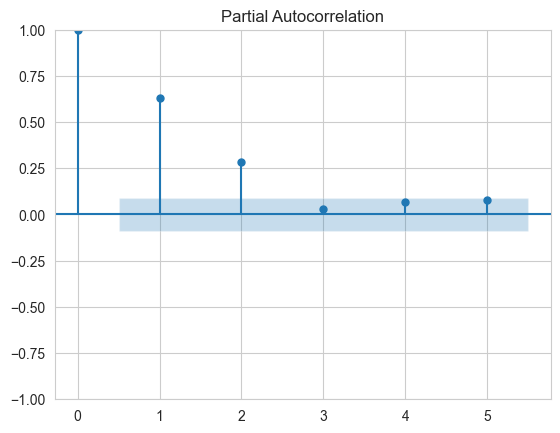

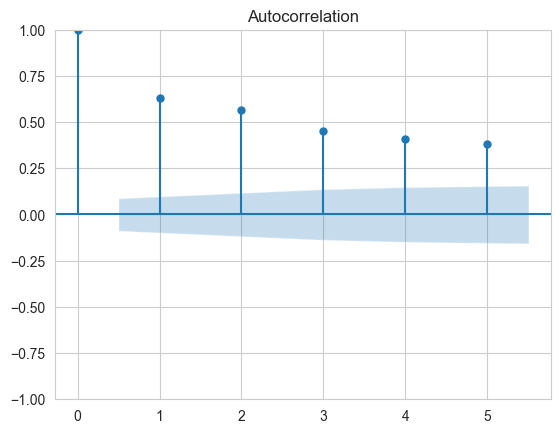

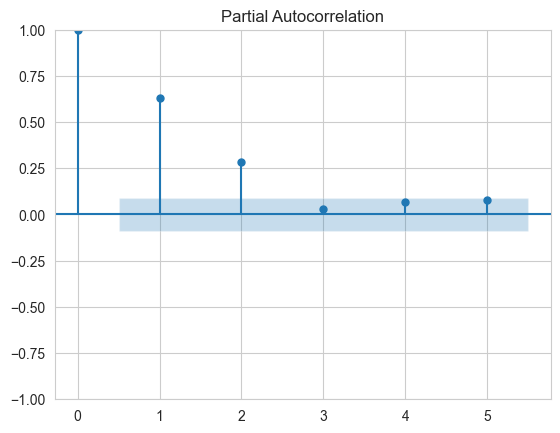

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(X, lags=5)
plot_pacf(X, lags = 5)

#### Augemnted Dickey-Fuller Test

In [7]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(X)
print('Testergebnis','P-Wert')
result[0], result[1]

Testergebnis P-Wert


(-6.37657421705353, 2.2760369862513647e-08)